<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

#Initial Setup

Clone repo, install dependencies and RESTART RUNTIME.

In [0]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies and RESTART RUNTIME

After restarting runtime, `%cd` back into `./yolov5` folder, import `torch` and check CUDA device.

In [64]:
%cd yolov5

/content/yolov5


In [66]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
# Re-clone (only if necessary, not normally used)
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

#1. Inference

Run inference with a pretrained checkpoint on contents of `inference/images` folder. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', half=False, img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/2 inference/images/bus.jpg: 640x512 3 persons, 1 buss, Done. (0.009s)
image 2/2 inference/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.009s)
Results saved to /content/yolov5/inference/output
Done. (0.118s)


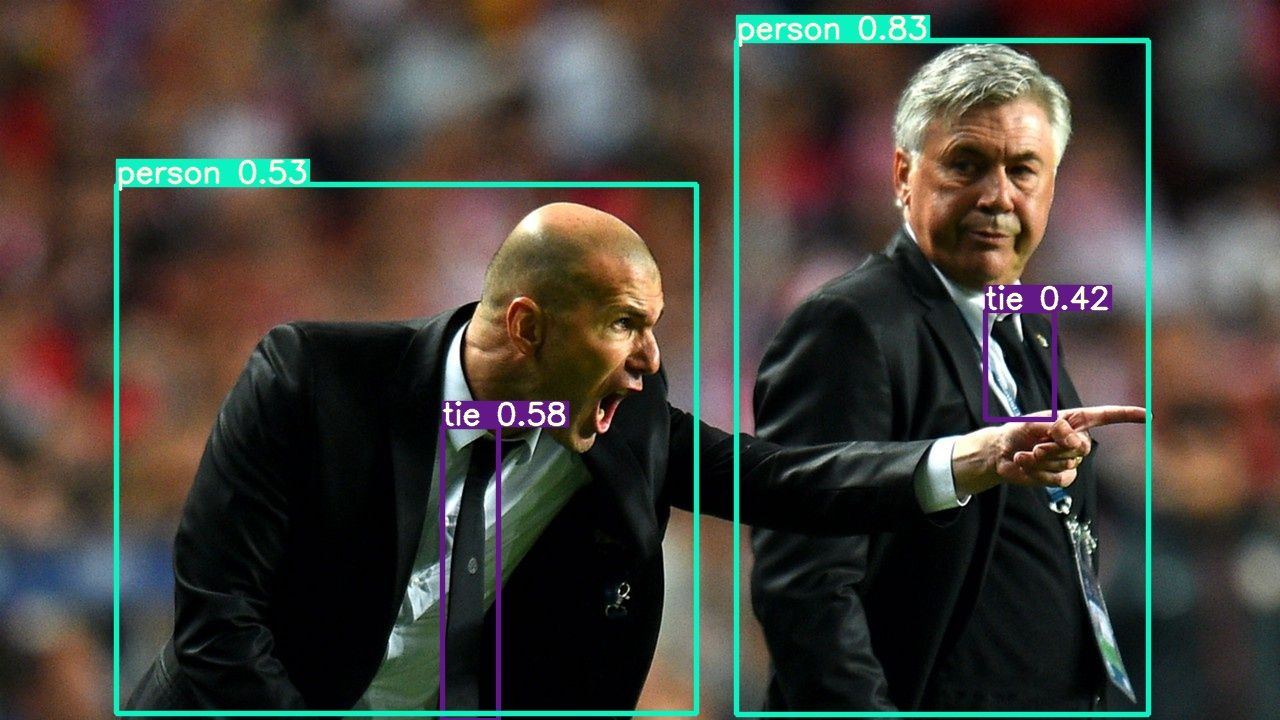

In [0]:
# Run inference
!python detect.py --weights yolov5s.pt --img 640 --conf 0.4 --source ./inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

#2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available. To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

###2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [0]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [56]:
# Run yolov5s on COCO val2017
!python test.py --weights yolov5s.pt --data ./data/coco.yaml

Namespace(augment=False, batch_size=16, conf_thres=0.001, data='././data/coco.yaml', device='', img_size=640, iou_thres=0.65, save_json=True, single_cls=False, task='val', verbose=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 99 layers, 6.99302e+06 parameters, 6.99302e+06 gradients
Caching labels ../coco/labels/val2017.npy (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100% 5000/5000 [00:00<00:00, 23176.56it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 313/313 [01:41<00:00,  3.07it/s]
                 all       5e+03    3.63e+04       0.317       0.621        0.52       0.314
Speed: 3.1/2.8/5.8 ms inference/NMS/total per 640x640 image at batch-size 16

COCO mAP with pycocotools... saving detections_val2017_yolov5s_results.json...
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
Loading and

In [0]:
# Run multiple models on COCO val2017
%%shell
for x in yolov5s yolov5m yolov5l yolov5x yolov3-spp
do 
  python test.py --weights $x.pt --data ./data/coco.yaml
done

###2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [0]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6339M  100 6339M    0     0  16.2M      0  0:06:30  0:06:30 --:--:-- 16.3M


In [0]:
# Run yolov5s on COCO test-dev2017
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test

# 3. Train

Download the 128-image tutorial training dataset `./data/coco128.yaml`, start tensorboard and train a `yolov5s.yaml` model for **5 epochs**. Note that actual training is typically much longer, around **300-1000 epochs**, depending on your dataset.

In [57]:
# Download tutorial dataset coco128.yaml
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # tutorial dataset
!mv ./coco128 ../  # move folder alongside /yolov5

In [0]:
# Start tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

Train a yolov5s model on the coco128 dataset by specifying model configuration file `--cfg ./models/yolo5s.yaml`, and a dataset configuration file `--data ./data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from scratch (randomly initialized weights) using `--weights ''`

Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.


In [62]:
# Train yolov5s on coco128 for 5 epochs
!python train.py --img 640 --batch 16 --epochs 5 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_coco128 --nosave --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='././models/yolov5s.yaml', data='././data/coco128.yaml', device='', epochs=5, evolve=False, img_size=[640], name='yolov5s_coco128', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-30 00:01:16.653829: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n   

#4. Visualize

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects. Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

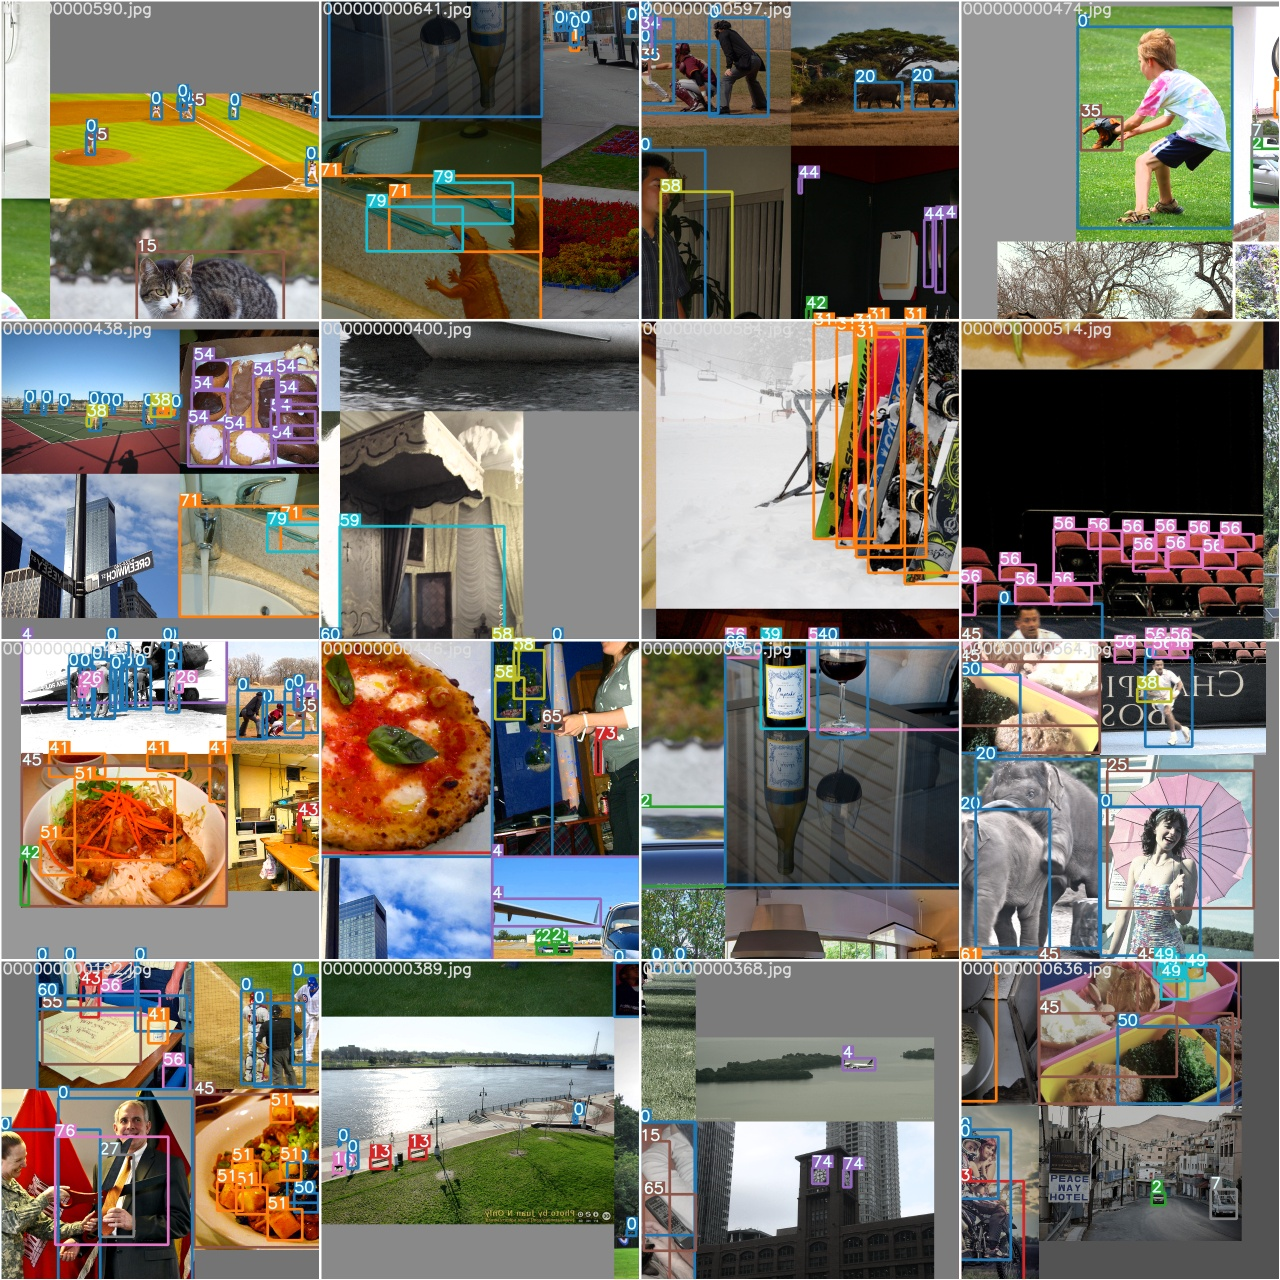

In [0]:
Image(filename='./train_batch1.jpg', width=900)  # view augmented train images

View `test_batch0_gt.jpg` to see test batch 0 ground truth labels.

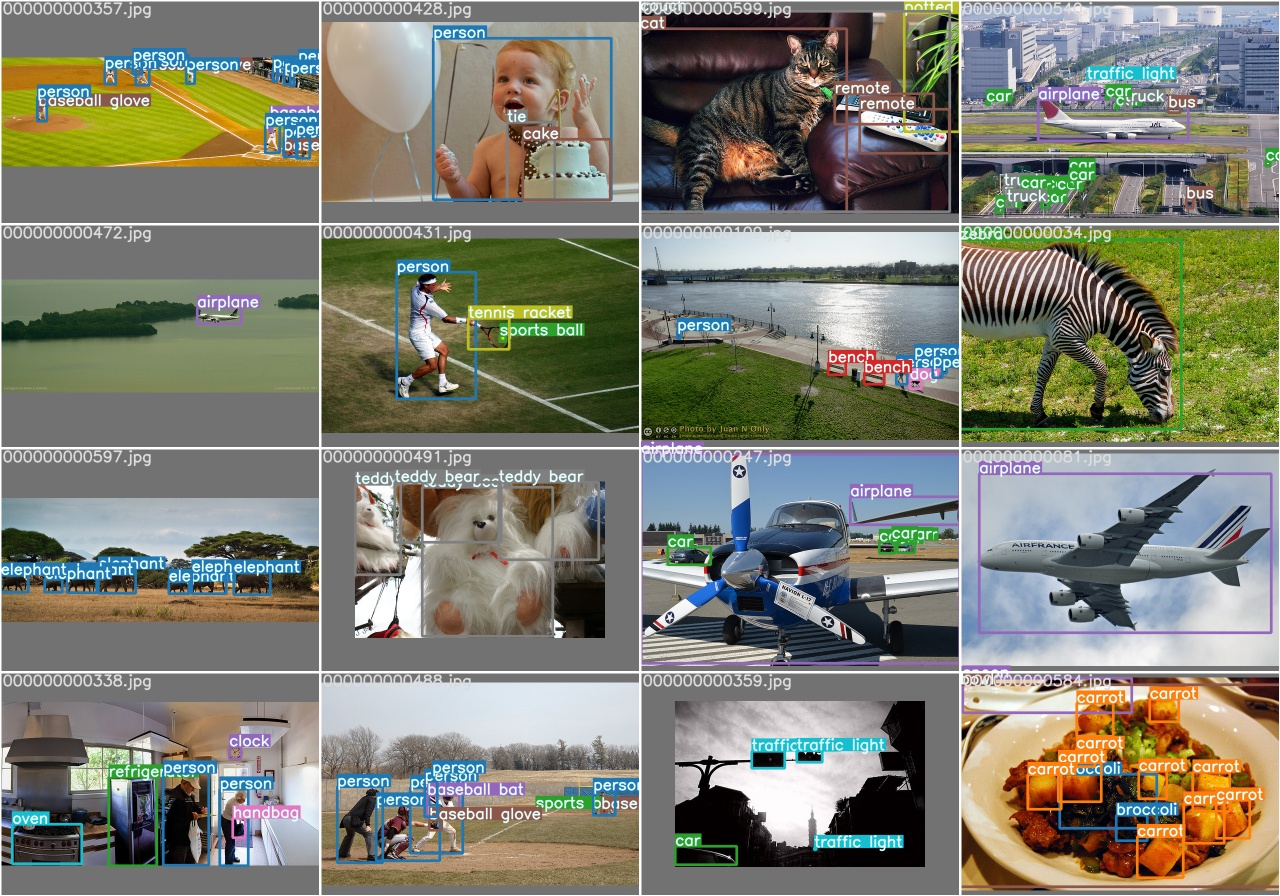

In [0]:
Image(filename='./test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 predictions.

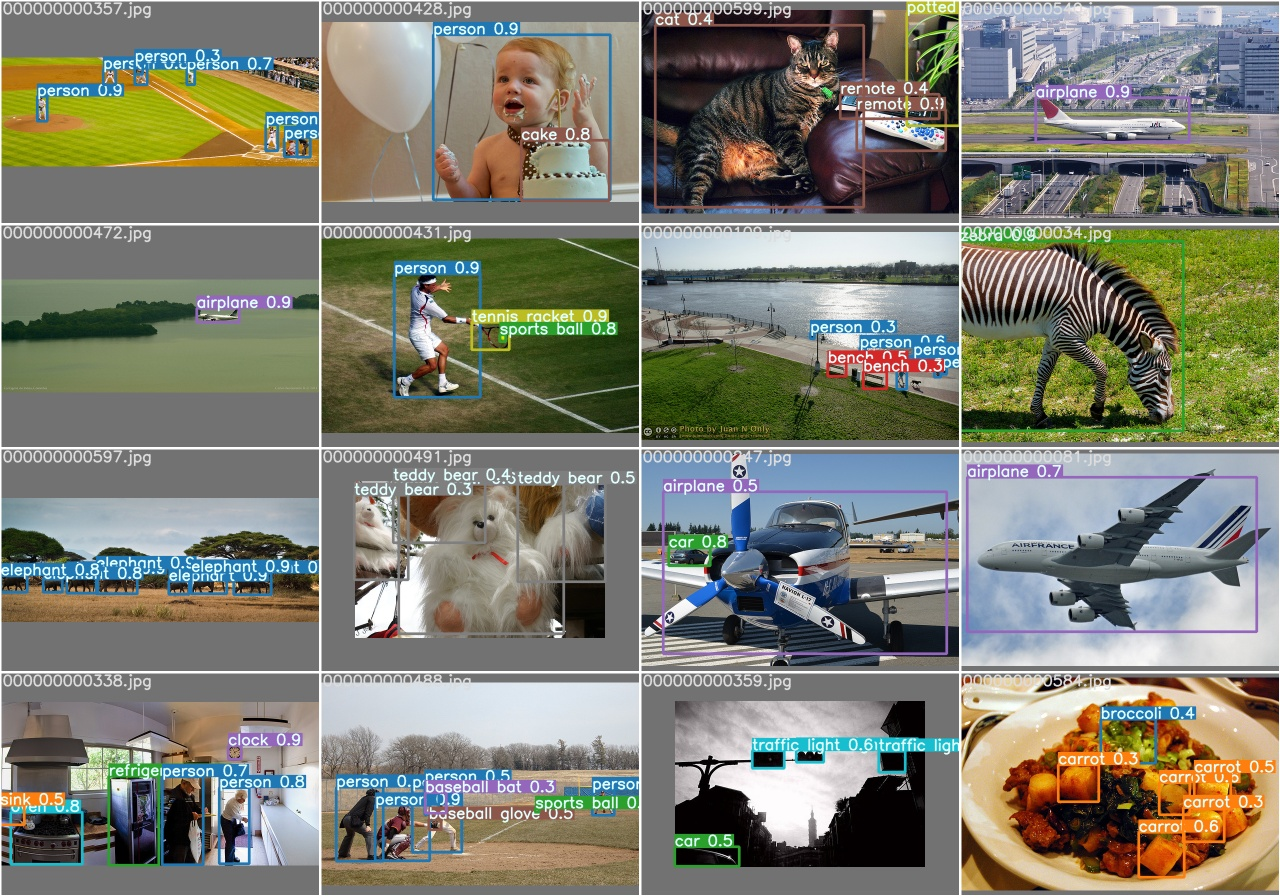

In [0]:
Image(filename='./test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`. Here we show yolov5s trained on coco128 to 100 epochs, starting from scratch (blue), and starting from pretrained `yolov5s.pt` weights (orange).

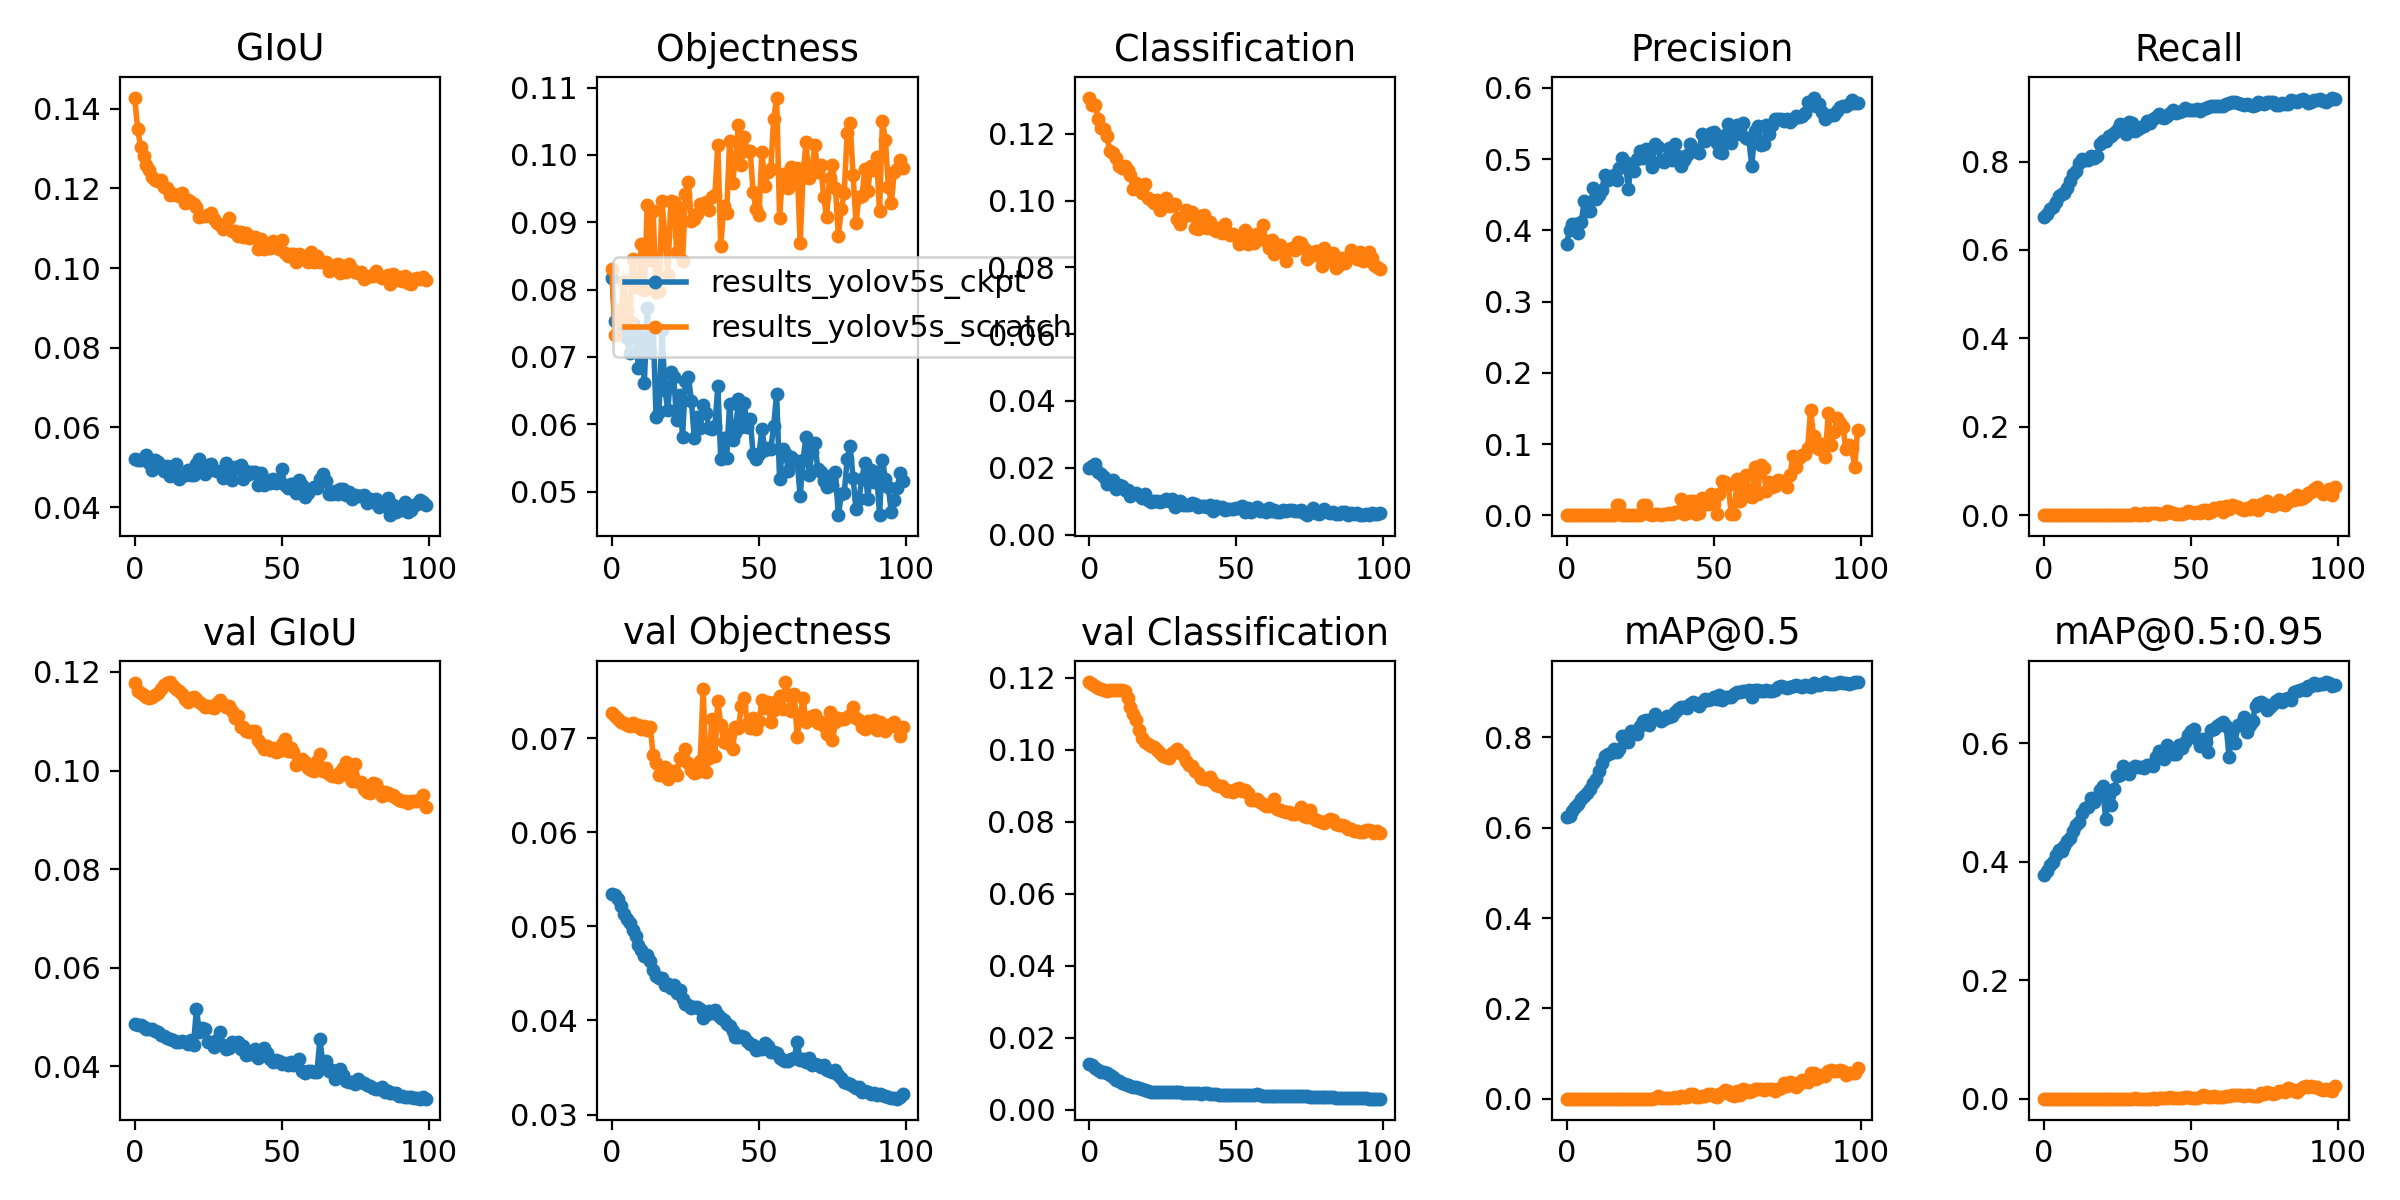

In [0]:
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png